In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [86]:
df = pd.read_csv('action_log/2025-03-05_15:43:27/gen_2.csv', index_col=0)
df

,0,1,2,3,4,5,6,7
0.60,6.0,0.0,8.0,25.0,0.0,8.0,4.0,7.0
0.62,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0
0.63,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0
0.64,0.0,0.0,0.0,27.0,0.0,0.0,0.0,0.0
0.66,0.0,0.0,2.0,38.0,0.0,2.0,0.0,0.0
0.67,0.0,0.0,2.0,0.0,0.0,2.0,0.0,2.0
0.68,2.0,0.0,5.0,32.0,0.0,2.0,1.0,2.0
0.69,1.0,0.0,6.0,0.0,0.0,3.0,0.0,2.0
0.70,1.0,0.0,10.0,30.0,0.0,3.0,19.0,4.0
0.71,3.0,0.0,13.0,0.0,0.0,4.0,1.0,6.0


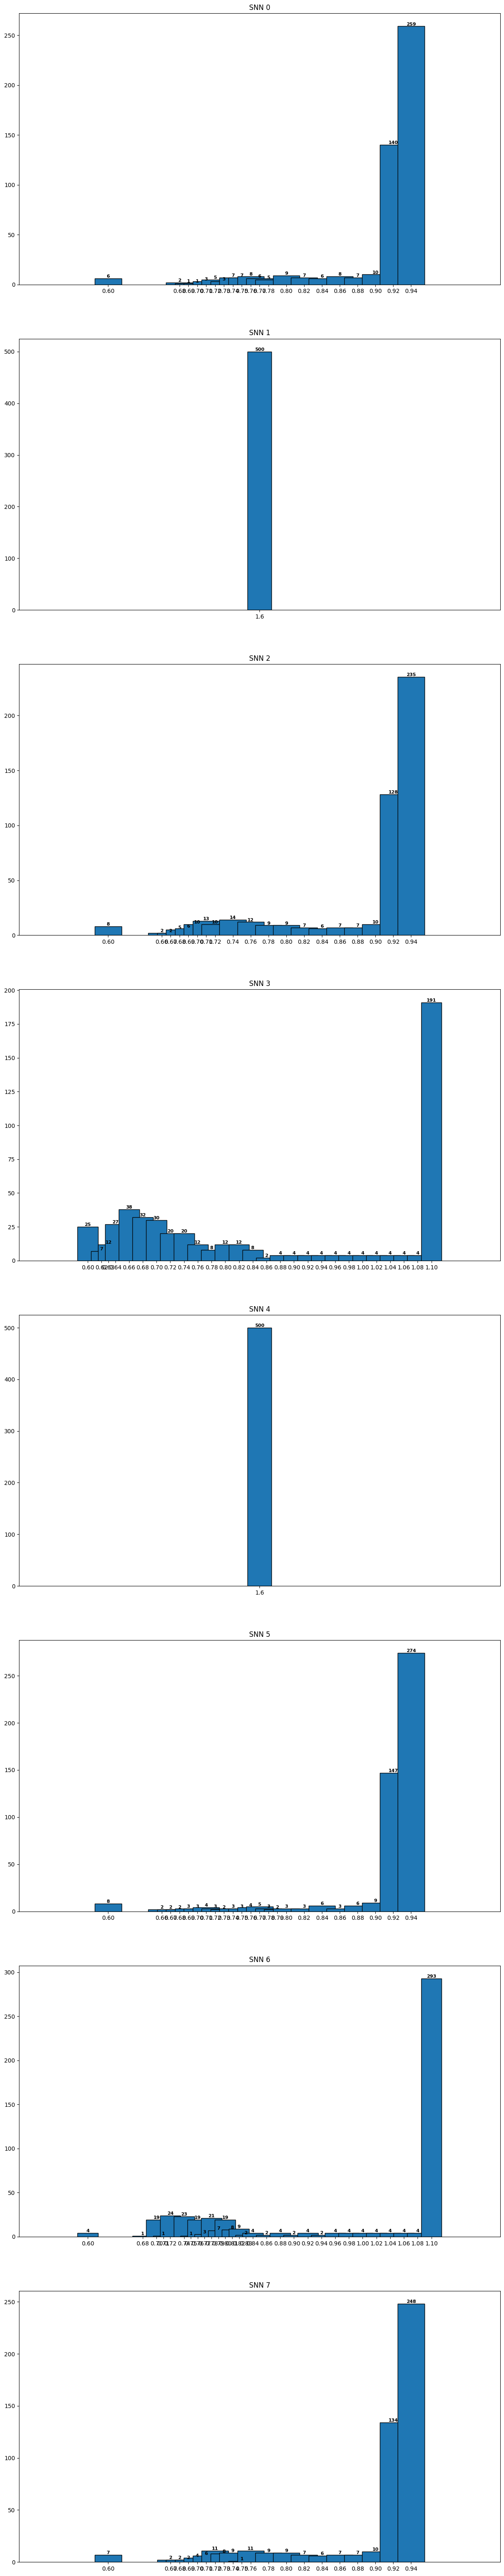

In [130]:
fig, ax = plt.subplots(8, 1, figsize=(15, 80))
ax = ax.flatten()

for i, col in enumerate(df.columns):
    non_zero_mask = df[col] != 0  # Mask to filter non-zero values
    non_zero_x = df.index[non_zero_mask]  # Use actual index values
    non_zero_y = df[col][non_zero_mask]

    bar_width = 0.03 if len(non_zero_x) > 1 else 0.01

    bars = ax[i].bar(non_zero_x, non_zero_y, edgecolor='black', width=bar_width)
    ax[i].set_title(f"SNN {col}")

    ax[i].set_xticks(non_zero_x)
    ax[i].set_xlim([non_zero_x.min() - 0.1, non_zero_x.max() + 0.1])

    for bar, x in zip(bars, non_zero_x):
        height = bar.get_height()
        ax[i].text(bar.get_x() + bar.get_width()/2, height, f'{int(height)}', ha='center', va='bottom', fontsize=8, fontweight='bold')

plt.show()

In [64]:
import os

log_dir = 'levels_log/2025-03-08_19:46:49'

dfs = []
for gen_dir in os.listdir(log_dir):
    df = pd.read_csv(os.path.join(log_dir, gen_dir, 'snn_1.csv'), index_col=0)
    
    # Rename columns to include the generation number (e.g., hidden_gen_0, hidden.1_gen_0, output_gen_0)
    df.columns = [f'{col}_{gen_dir}' for col in df.columns]
    
    # Append the DataFrame to the list of DataFrames
    dfs.append(df)

df2 = pd.concat(dfs, axis=1)
df2

,hidden_gen_1,hidden.1_gen_1,output_gen_1,hidden_gen_0,hidden.1_gen_0,output_gen_0,hidden_gen_2,hidden.1_gen_2,output_gen_2,hidden_gen_3,hidden.1_gen_3,output_gen_3,hidden_gen_4,hidden.1_gen_4,output_gen_4
0,-0.194848,0.978810,0.000000,0.953783,-0.075867,0.967858,-0.233645,0.782480,0.706611,0.836445,0.029105,0.958371,0.928518,-0.953434,0.000000
1,-0.368652,1.848265,-0.297602,0.935544,-0.146715,0.967858,-0.442283,0.768324,0.706611,0.821592,0.051588,0.958371,1.751848,-1.797833,0.978718
2,-0.521878,0.959005,0.000000,0.919686,-0.218970,0.967858,-0.631695,0.756110,0.706611,0.804492,0.060986,0.958371,0.908102,-2.545977,0.000000
3,-0.654481,1.819971,-0.297602,0.913208,-0.292354,0.967858,-0.801617,0.752241,0.706611,0.795081,0.058231,0.958371,1.722491,-3.214312,0.978718
4,-0.770672,0.944470,0.000000,0.911409,-0.363406,0.967858,-0.941250,0.754030,0.706611,0.789817,0.047748,0.958371,0.904286,-3.815933,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-1.756754,1.727776,-0.297602,0.904561,-1.132361,0.967858,-1.379052,0.787589,0.706611,0.773859,-0.260026,0.958371,1.679214,-9.355811,0.978718
996,-1.756849,0.909338,0.000000,0.904489,-1.132364,0.967858,-1.379422,0.787547,0.706611,0.773835,-0.259918,0.958371,0.883827,-9.355854,0.000000
997,-1.756963,1.727777,-0.297602,0.904522,-1.132365,0.967858,-1.379771,0.787551,0.706611,0.773769,-0.259754,0.958371,1.679221,-9.355839,0.978718
998,-1.757012,0.909347,0.000000,0.904586,-1.132355,0.967858,-1.380117,0.787620,0.706611,0.773873,-0.259562,0.958371,0.883835,-9.355870,0.000000


In [65]:
groups = df2.groupby(lambda x: x.split('_')[-1], axis=1)
groups.groups

/var/folders/85/dp5plpz51fgcw6kgg4cf7trc0000gn/T/ipykernel_52905/1831077285.py:1: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  groups = df2.groupby(lambda x: x.split('_')[-1], axis=1)


{'0': ['hidden_gen_0', 'hidden.1_gen_0', 'output_gen_0'], '1': ['hidden_gen_1', 'hidden.1_gen_1', 'output_gen_1'], '2': ['hidden_gen_2', 'hidden.1_gen_2', 'output_gen_2'], '3': ['hidden_gen_3', 'hidden.1_gen_3', 'output_gen_3'], '4': ['hidden_gen_4', 'hidden.1_gen_4', 'output_gen_4']}

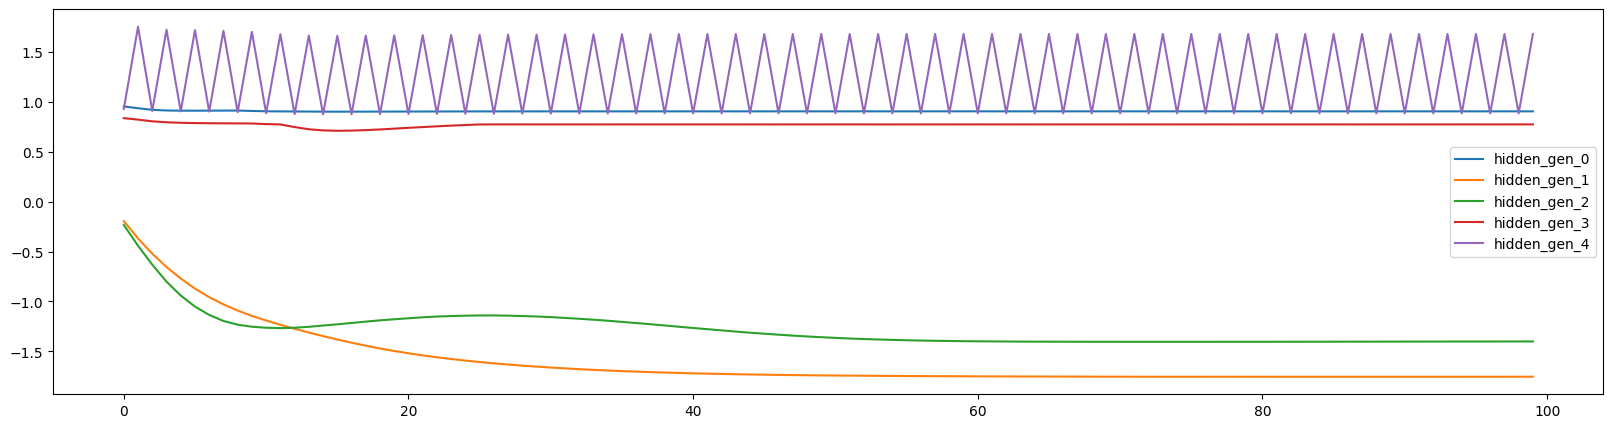

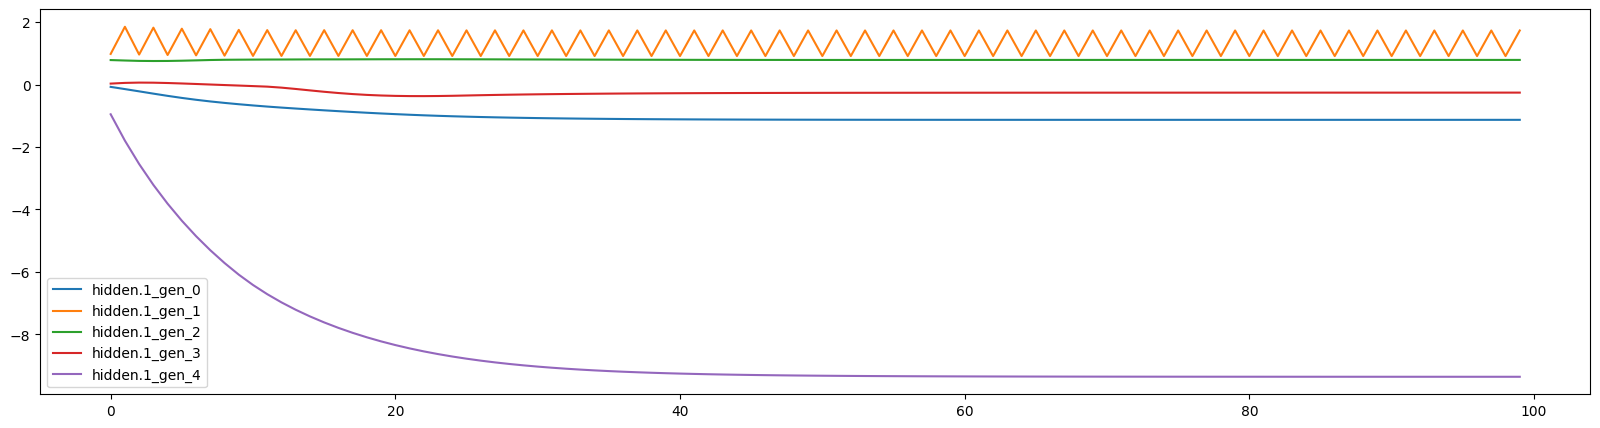

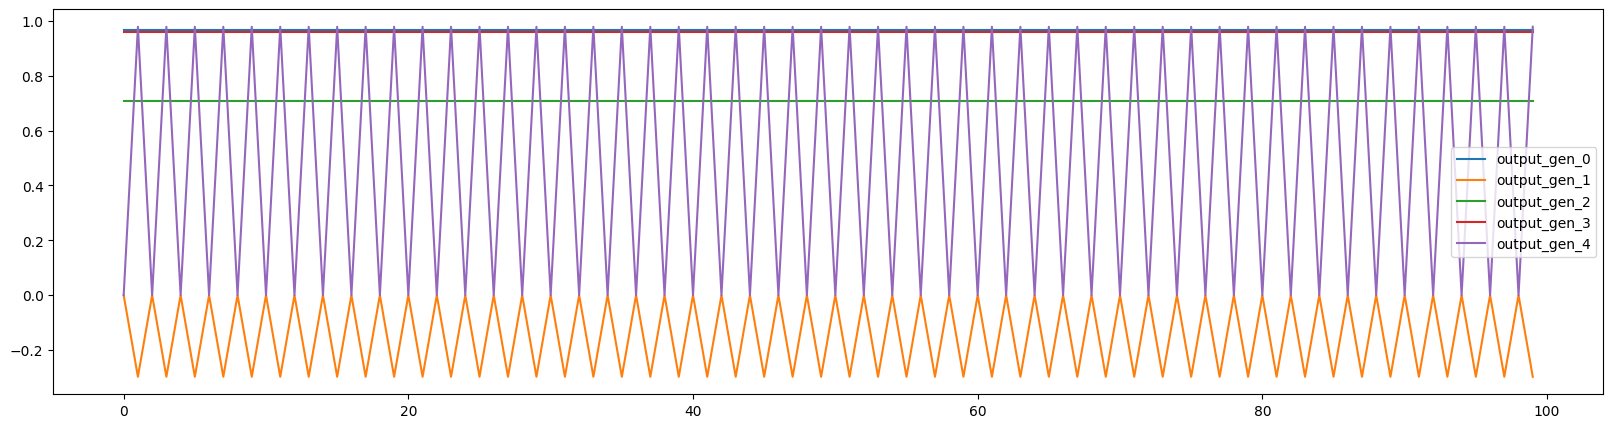

In [67]:
for i in range(3):
    plt.figure(figsize=(20, 5))
    for group, cols in groups.groups.items():
        groups.get_group(group)[cols[i]][:100].plot()
    plt.legend()

plt.show()